#Import needed libraries

In [1]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score as R2

#Preprocess data

In [2]:
dataset = pd.read_csv('/content/tesla_stock.csv')
dataset.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [3]:
#Remove 'NaN', 'None', ... values
dataset.dropna(inplace = True)

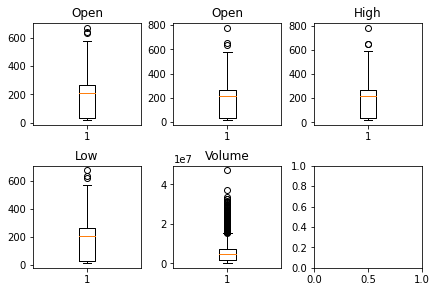

In [4]:
#Find outliers
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(dataset['Open'])
axs[0, 0].set_title('Open')

axs[0, 1].boxplot(dataset['Close'])
axs[0, 1].set_title('Open')

axs[0, 2].boxplot(dataset['High'])
axs[0, 2].set_title('High')

axs[1, 0].boxplot(dataset['Low'])
axs[1, 0].set_title('Low')

axs[1, 1].boxplot(dataset['Volume'])
axs[1, 1].set_title('Volume')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

In [5]:
#Remove outliers
for i in dataset.columns:
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1

  low_fence = Q1 - 1.5 * IQR
  up_fence = Q3 + 1.5 * IQR

  dataset = dataset[~((dataset[i] < low_fence) | (dataset[i] > up_fence))]

In [6]:
#Normalize data
min_max_scaler = MinMaxScaler()
dataset[['Open']] = min_max_scaler.fit_transform(dataset[['Open']])
dataset[['High']] = min_max_scaler.fit_transform(dataset[['High']])
dataset[['Low']] = min_max_scaler.fit_transform(dataset[['Low']])
dataset[['Volume']] = min_max_scaler.fit_transform(dataset[['Volume']])
dataset[['Close']] = min_max_scaler.fit_transform(dataset[['Close']])

In [7]:
dataset

,Open,High,Low,Close,Volume
2,0.015979,0.016584,0.009740,0.011178,0.531648
3,0.012372,0.011550,0.006868,0.006169,0.329564
4,0.006961,0.006016,0.001565,0.000563,0.442919
5,0.000469,0.000000,0.000000,0.000000,0.446516
6,0.000000,0.001589,0.001086,0.003012,0.498346
...,...,...,...,...,...
2400,0.839781,0.835999,0.844633,0.838958,0.842795
2405,0.886346,0.890856,0.898877,0.897659,0.886743
2409,1.000000,0.994734,0.992966,0.996226,0.934295
2410,0.948349,0.977918,0.965384,0.983887,0.885365


#Linear Regression Implementation

In [8]:
class LinearRegression_GD:
  def __init__(self, eta = 0.001, max_iter = 20, random_state = 21522786): #21522786 is my student ID, lmao :)))
    self.eta = eta
    self.max_iter = max_iter 
    self.random_state = random_state
    self.w = None
    self.costs = []

  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = []
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      #Update the parameters with gradient descent
      self.w[0] += self.eta * np.sum(diff)
      self.w[1:] += self.eta * np.dot(X.T, diff)
      cost = np.sum(diff ** 2) / 2 # Compute the cost value
      self.costs.append(cost)      

#Train Model

In [9]:
y = dataset['Close']
X = dataset[['Open', 'High', 'Low', 'Volume']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21522786)

In [11]:
reg_GD = LinearRegression_GD(eta = 0.0005, max_iter = 200, random_state = 21522786)
reg_GD.fit(X_train, y_train)
reg_GD.w

array([-3.35274660e-05,  3.24727183e-01,  3.37967059e-01,  3.38571795e-01,
        2.80964904e-03])

#Visualize the trend in the cost values

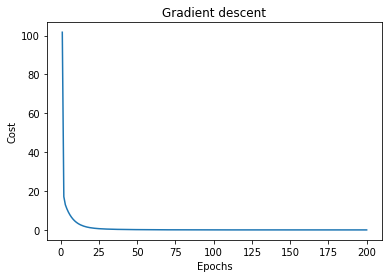

In [12]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient descent')
plt.show()

#Compare with built-in Gradient Descent (using Normal Equation)

In [15]:
predicted_GD = reg_GD.predict(X_test)

In [16]:
print("R2 of GD: ", R2(y_test, predicted_GD))

R2 of GD:  0.9993305202517967


In [17]:
reg_NE = LinearRegression()
reg_NE.fit(X_train, y_train)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([-3.25513249e-04, -6.31825050e-01,  8.89918746e-01,  7.40331470e-01,
        4.23048732e-04])

In [18]:
predicted_NE = reg_NE.predict(X_test)

In [19]:
print("R2 of NE: ", R2(y_test, predicted_NE))

R2 of NE:  0.9997216739330268
